In [10]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [388]:
sim = rebound.Simulation()
sim.add(m=1,r=0.0046524726)
sim.add(m=1,r=0.0046524726)
sim.add(m=1e-3,r=0.00046732617)
sim.add(m=1e-6,r=4.2587571e-05)
#sim.add(m=1e-6,r=4.2587571e-05)
sim.dt = 1e-2

In [389]:
def timestep(sim, p1, p2, r):
    eps = 1e-1
    kappa = 4/3
    t1 = (eps*np.sqrt(r**3/sim.G/p1.m)/sim.dt)**kappa*sim.dt
    t2 = (eps*np.sqrt(r**3/sim.G/p2.m)/sim.dt)**kappa*sim.dt
    return np.min([t1,t2,sim.dt])

In [390]:
def twoBody(sim, p1, p2, r,adaptive=True):
    mu = sim.G*(p1.m+p2.m)
    T = 2*np.pi*np.sqrt(r**3/mu)
    if adaptive:
        dt = timestep(sim,p1,p2,r)
    else:
        dt = sim.dt
    return sim.G*p2.m/(p1.m+p2.m)/r *(dt/T)**2   +1e-16
def threeBody(sim, p1, p2, p3, r, rfar,adaptive=True):
    if adaptive:
        dt = timestep(sim,p2,p3,rfar)
    else:
        dt = sim.dt
    return sim.G*(p2.m*p3.m)/r /rfar**3  * dt**2   +1e-16

In [391]:
Nrs = 30

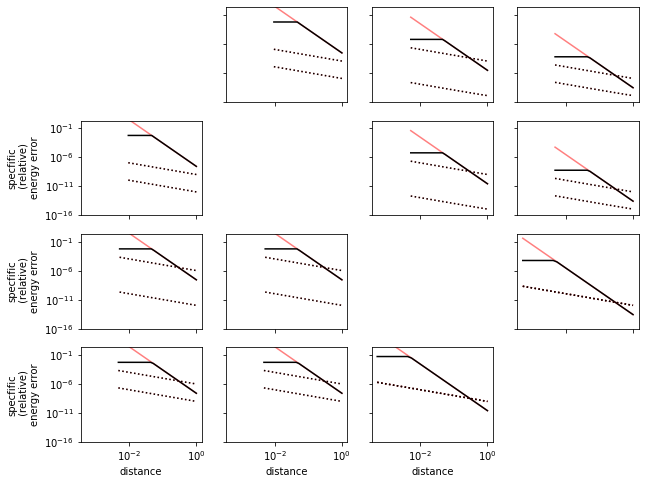

In [387]:
fig,axs = plt.subplots(len(sim.particles),len(sim.particles),figsize=(10,8),sharey=True,sharex=True)
c = ["black","red","blue"]
for i in range(sim.N):
    for j in range(sim.N):
        ax = axs[i][j]
        if i==sim.N-1:
            ax.set_xlabel("distance")
            ax.set_xscale("log")
        if j==0:
            ax.set_ylabel("specfific\n (relative)\nenergy error")
            ax.set_yscale("log")    
            ax.set_ylim([1e-16,2])
        if i==j:
            ax.remove()
            continue
        
        rmin = sim.particles[i].r + sim.particles[j].r
        rs = np.logspace(np.log10(rmin),0,Nrs)
        ax.plot(rs, [twoBody(sim,sim.particles[i],sim.particles[j],r,adaptive=False) for r in rs],ls="-",color="red",alpha=0.5)
        ax.plot(rs, [twoBody(sim,sim.particles[i],sim.particles[j],r) for r in rs],ls="-",color="black")
        
        for k in range(sim.N):
            if k==i or k==j:
                continue
                
            ax.plot(rs, [threeBody(sim,sim.particles[i],sim.particles[j],sim.particles[k],r,1.,adaptive=False) for r in rs],ls=":",color="red",alpha=0.5)
            ax.plot(rs, [threeBody(sim,sim.particles[i],sim.particles[j],sim.particles[k],r,1.) for r in rs],ls=":",color="black")       